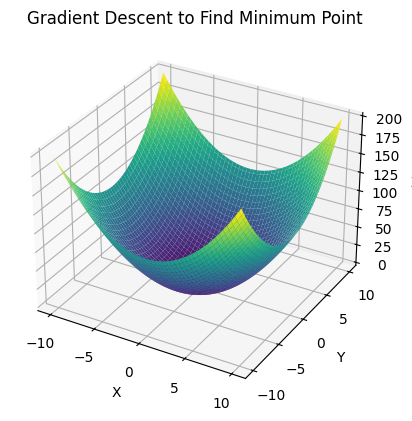

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scratch.linear_algebra import sum_of_squares, Vector


# Create a grid of values
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([sum_of_squares([x, y])
             for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Gradient Descent to Find Minimum Point')

plt.show()

In [2]:
from typing import Callable, List


def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    """
    Calculate the difference quotient of a function at a given point.
    This function calculates the difference quotient of a function `f` at a given
    point `x`. The difference quotient is an approximation of the derivative of
    the function at that point.
    Parameters:
    -----------
    f : Callable[[float], float]
        The function for which to calculate the difference quotient.
    x : float
        The point at which to calculate the difference quotient.
    h : float
        The small value by which to perturb `x`.
    Returns:
    --------
    float:
        The difference quotient of the function at the given point.
    """
    return (f(x + h) - f(x)) / h

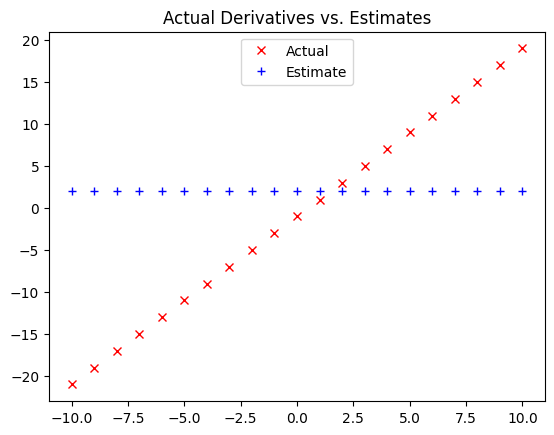

In [3]:
xs = range(-10, 11)
actuals = [2 * x - 1 for x in xs]
estimateds = [difference_quotient(lambda x: 2 * x - 1, x, h=0.001) for x in xs]

# plot to show they're basically the same
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimateds, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [4]:
def partial_difference_quotient(f: Callable[[float], float], v: List[float], i: int, h: float) -> float:
    """
    Calculate the partial difference quotient of a function at a given point.
    This function calculates the partial difference quotient of a function `f` at a given
    point `v`. The partial difference quotient is an approximation of the partial derivative
    of the function at that point with respect to the `i`-th variable.
    Parameters:
    -----------
    f : Callable[[List[float]], float]
        The function for which to calculate the partial difference quotient.
    v : List[float]
        The point at which to calculate the partial difference quotient.
    i : int
        The index of the variable with respect to which to calculate the partial derivative.
    h : float
        The small value by which to perturb the `i`-th variable.
    Returns:
    --------
    float:
        The partial difference quotient of the function at the given point.
    """
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

In [5]:
def estimate_gradient(f: Callable[[List[float]], float], v: List[float], h: float = 0.00001) -> List[float]:
    """
    Estimate the gradient of a function at a given point.
    This function estimates the gradient of a function `f` at a given point `v`. The gradient
    is a vector of partial derivatives of the function at that point.
    Parameters:
    -----------
    f : Callable[[List[float]], float]
        The function for which to calculate the gradient.
    v : List[float]
        The point at which to calculate the gradient.
    h : float
        The small value by which to perturb the variables.
    Returns:
    --------
    List[float]:
        The gradient of the function at the given point.
    """
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]

In [6]:
import random
from scratch.linear_algebra import distance, add, scalar_multiply


def gradient_step(v: List[float], gradient: List[float], step_size: float) -> List[float]:
    """
    Take a step in the direction of the gradient.
    This function takes a step in the direction of the gradient of a function `f` at a given
    point `v`. The step size is determined by the `step_size` parameter.
    Parameters:
    -----------
    v : List[float]
        The point at which to take a step.
    gradient : List[float]
        The gradient of the function at the given point.
    step_size : float
        The size of the step to take.
    Returns:
    --------
    List[float]:
        The new point after taking a step in the direction of the gradient.
    """
    step = scalar_multiply(step_size, gradient)
    return add(v, step)


def sum_of_squares_gradient(v: List[float]) -> List[float]:
    """
    Calculate the gradient of the sum of squares function.
    This function calculates the gradient of the sum of squares function at a given point `v`.
    The sum of squares function is a simple quadratic function that has a minimum at the origin.
    Parameters:
    -----------
    v : List[float]
        The point at which to calculate the gradient.
    Returns:
    --------
    List[float]:
        The gradient of the sum of squares function at the given point.
    """
    return [2 * v_i for v_i in v]

In [7]:
# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]
print('v value:', v)

for epoch in range(1000):
    grad = sum_of_squares_gradient(v)  # compute the gradient at v
    v = gradient_step(v, grad, -0.01)  # take a negative gradient step

    print(epoch, v)

assert distance(v, [0, 0, 0]) < 0.001  # v should be close to 0

v value: [-6.650054380329859, 3.5472738279829326, -8.682083739112311]
0 [-6.517053292723262, 3.476328351423274, -8.508442064330065]
1 [-6.386712226868797, 3.406801784394809, -8.338273223043464]
2 [-6.25897798233142, 3.3386657487069127, -8.171507758582594]
3 [-6.133798422684792, 3.2718924337327744, -8.008077603410943]
4 [-6.011122454231096, 3.2064545850581188, -7.8479160513427235]
5 [-5.890900005146474, 3.142325493356956, -7.690957730315869]
6 [-5.773082005043544, 3.079478983489817, -7.537138575709552]
7 [-5.657620364942673, 3.017889403820021, -7.38639580419536]
8 [-5.544467957643819, 2.9575316157436204, -7.238667888111453]
9 [-5.433578598490943, 2.898380983428748, -7.093894530349224]
10 [-5.324907026521124, 2.8404133637601734, -6.952016639742239]
11 [-5.218408885990701, 2.78360509648497, -6.8129763069473945]
12 [-5.114040708270887, 2.7279329945552706, -6.676716780808446]
13 [-5.011759894105469, 2.673374334664165, -6.5431824451922775]
14 [-4.91152469622336, 2.619906847970882, -6.4123187

In [8]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    """
    Calculate the gradient of the linear regression model.
    This function calculates the gradient of the linear regression model at a given point `(x, y)`.
    The linear regression model is parameterized by the vector `theta`.
    Parameters:
    -----------
    x : float
        The input feature.
    y : float
        The observed output.
    theta : List[float]
        The parameters of the linear regression model.
    Returns:
    --------
    List[float]:
        The gradient of the linear regression model at the given point.
    """
    slope, intercept = theta
    predicted = slope * x + intercept
    error = predicted - y
    # squared_error = error ** 2
    grad = [2 * error * x, 2 * error]
    return grad

In [9]:
# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In [10]:
from scratch.linear_algebra import vector_mean

# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.17073587178336, 0.3835736459417298]
1 [11.21050274716644, 0.4059772345216298]
2 [25.858000644874508, 0.406375782799753]
3 [16.088119945651503, 0.421421031879028]
4 [22.604645417282327, 0.42666630976092146]
5 [18.25812817298245, 0.43841762255868194]
6 [21.157266926243267, 0.44579891548654704]
7 [19.223548759111228, 0.4560645845818172]
8 [20.513349042257392, 0.46437600417176483]
9 [19.653060564818492, 0.47396060120567873]
10 [20.22688256386727, 0.4826657405680858]
11 [19.8441519956411, 0.4919272916508169]
12 [20.09944254619904, 0.5007875890631563]
13 [19.929172609274303, 0.5098854564312291]
14 [20.04275175507047, 0.5187948581276409]
15 [19.967003374226124, 0.5278000201664561]
16 [20.017536549411343, 0.5367114235003494]
17 [19.983839832966137, 0.54565553720276]
18 [20.006324486948788, 0.5545480659613207]
19 [19.99133611527112, 0.5634452943163468]
20 [20.001342256408478, 0.5723097398429853]
21 [19.99467702471539, 0.5811664626197077]
22 [19.999131590977456, 0.5899988067191837]
23 [19.

In [11]:
from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions


def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Gererate `batch_size`-sized minibatches from the dataset"""
    # start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle:
        random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

In [12]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"

0 [18.479132428042078, 1.4207278120731988]
1 [19.066487476223067, 1.4047113932305602]
2 [19.88831679703812, 1.3603939414194566]
3 [20.001805668795978, 1.3840153034724627]
4 [19.824500159233015, 1.3979775768541676]
5 [19.641218157877532, 1.4269689519519464]
6 [20.103998827742856, 1.3610259444276027]
7 [20.012408503492157, 1.5304694908236878]
8 [19.854495765949736, 1.68744994496911]
9 [20.181418593725624, 1.718132445188235]
10 [20.03008334599193, 1.735739038495212]
11 [19.849414476962437, 1.7463498444966754]
12 [19.79446150689264, 1.7534828760762133]
13 [19.944195561423687, 1.7501988037577807]
14 [20.008746946240024, 1.7707107344283826]
15 [20.149186864365593, 1.7836789002886038]
16 [20.12121809849306, 1.9373885729340834]
17 [19.976301461639725, 1.9539027634736872]
18 [20.1449452247301, 1.9642330240940735]
19 [20.218466483789935, 1.974090486722801]
20 [19.916362929087605, 2.031695521346252]
21 [20.076087863493726, 2.0613315308630846]
22 [19.712337492688782, 2.0920769415390033]
23 [19.863